# The New York Times Best Sellers
    Base de dados com o top 5 livros mais vendidos da semana segundo a revista The New York Times.
    
# Período Analisado
    Março de 2010 a Dezembro de 2019.
    
# Objetivo da análise
    Analisar quais livros e autores permaneceram por maior núme ro de semanas no topo da lista em cada categoria.
    Autor: Arthur Lima Moreira
    Link para download do dataset: https://www.kaggle.com/datasets/dhruvildave/new-york-times-best-sellers/download

# Importação do pandas e da base de dados

In [3]:
import pandas as pd
import wget as wg
import matplotlib as plt

url = 'https://www.kaggle.com/datasets/dhruvildave/new-york-times-best-sellers/download'
tabela = wg.download(url)
# tabela = pd.read_csv('bestsellers.csv')
display(tabela)

ModuleNotFoundError: No module named 'wget'

# Deletando tabelas que não serão utilizadas na análise

In [2]:
tabela = tabela.drop('list_name_encoded', axis = 1)
tabela = tabela.drop('amazon_product_url', axis = 1)
tabela = tabela.drop('isbn10', axis = 1)
tabela = tabela.drop('isbn13', axis = 1)
tabela = tabela.drop('description', axis = 1)
display(tabela)

,published_date,list_name,rank,title,author,price,weeks_on_list
0,2010-01-03,Chapter Books,1,WITCH AND WIZARD,James Patterson and Gabrielle Charbonnet,17.99,1
1,2010-01-03,Chapter Books,2,THE HUNGER GAMES,Suzanne Collins,17.99,67
2,2010-01-03,Chapter Books,3,CATCHING FIRE,Suzanne Collins,17.99,16
3,2010-01-03,Chapter Books,4,THE MAGICIAN’S ELEPHANT,Kate DiCamillo,16.99,15
4,2010-01-03,Chapter Books,5,FALLEN,Lauren Kate,17.99,2
...,...,...,...,...,...,...,...
61425,2019-12-29,Young Adult Paperback Monthly,1,LET IT SNOW,"John Green, Maureen Johnson and Lauren Myracle",0.00,0
61426,2019-12-29,Young Adult Paperback Monthly,2,LOOKING FOR ALASKA,John Green,0.00,0
61427,2019-12-29,Young Adult Paperback Monthly,3,LONG WAY DOWN,Jason Reynolds,0.00,0
61428,2019-12-29,Young Adult Paperback Monthly,4,THE SUN IS ALSO A STAR,Nicola Yoon,0.00,0


# Quantidade de semanas

In [3]:
print(tabela['published_date'].value_counts().shape)
# 522 semanas de publicação no dataset

(522,)


# Verificando valores nulos

In [4]:
tabela.isnull().sum()

published_date     0
list_name          0
rank               0
title              0
author            69
price              0
weeks_on_list      0
dtype: int64

Alterando os valores nulos de autores para 'Unknown'

In [5]:
tabela.fillna({'author': 'Unknown'}, inplace=True)
tabela.isnull().sum()

published_date    0
list_name         0
rank              0
title             0
author            0
price             0
weeks_on_list     0
dtype: int64

# Analisando cada categoria individualmente

In [6]:
categorias = tabela['list_name'].value_counts(normalize = True)
lista_autores = tabela[['rank', 'list_name', 'author', 'weeks_on_list']].groupby(['rank', 'list_name', 'author']).max()
display(lista_autores)
display(categorias*100)

weeks_on_list
rank list_name                       author                                     
1    Advice How-To and Miscellaneous Allie Brosh                               9
                                     Bill Burnett and Dave Evans               1
                                     Bob Bones                                 1
                                     Bob Harper                                1
                                     Bob Harper with Greg Critser              1
...                                                                          ...
5    Young Adult Paperback           Tommy Wallach                             6
                                     Victoria Aveyard                         32
     Young Adult Paperback Monthly   John Green                                0
                                     Nic Stone                                 0
                                     Nicola Yoon                               0

[14220 rows x 1 columns]

Series Books                            4.248738
Trade Fiction Paperback                 4.248738
Hardcover Fiction                       4.248738
Hardcover Nonfiction                    4.248738
Paperback Nonfiction                    4.248738
Picture Books                           4.248738
Combined Print and E-Book Nonfiction    3.776656
Combined Print and E-Book Fiction       3.776656
Hardcover Graphic Books                 3.011558
Manga                                   3.011558
Mass Market Paperback                   3.011558
Paperback Graphic Books                 3.011558
Advice How-To and Miscellaneous         2.840632
Science                                 2.759238
Business Books                          2.580173
E-Book Fiction                          2.539476
E-Book Nonfiction                       2.539476
Sports                                  2.376689
Hardcover Political Books               2.197623
Childrens Middle Grade Hardcover        1.847631
Young Adult Hardcove

#   Critério de separação de classes
Para evitar conflitos de dados repetidos, serão utilizadas as classes (list_name) para separar o dataset inicial para cada novo estudo.

# Books Series - Análise

In [7]:
classe_series = tabela.loc[tabela['list_name'] == 'Series Books']
'''
preco = classe_series['price'].value_counts()
display(preco)
Como a coluna price não possui valor nesta categoria, pode ser deletada
'''
classe_series = classe_series.drop('price', axis = 1)
display(classe_series)


,published_date,list_name,rank,title,author,weeks_on_list
60,2010-01-03,Series Books,1,THE TWILIGHT SAGA,Stephenie Meyer,124
61,2010-01-03,Series Books,2,DIARY OF A WIMPY KID,Jeff Kinney,49
62,2010-01-03,Series Books,3,PERCY JACKSON & THE OLYMPIANS,Rick Riordan,128
63,2010-01-03,Series Books,4,HOUSE OF NIGHT,PC Cast and Kristin Cast,69
64,2010-01-03,Series Books,5,THE 39 CLUES,various authors,32
...,...,...,...,...,...,...
61410,2019-12-29,Series Books,1,DOG MAN,Dav Pilkey,120
61411,2019-12-29,Series Books,2,DIARY OF A WIMPY KID,Jeff Kinney,561
61412,2019-12-29,Series Books,3,HARRY POTTER,JK Rowling,560
61413,2019-12-29,Series Books,4,CAPTAIN UNDERPANTS,Dav Pilkey,200


# Books Series - Separação de maiores best-sellers
    Amostragem de última semana em que os best-sellers apareceram na lista e número máximo de semanas que permaneceu na lista (acima de 100 semanas).

In [8]:
#   SELECIONANDO AS 10 SÉRIES DE LIVROS MAIS VENDIDAS
books_series = classe_series[['published_date', 'title', 'author', 'weeks_on_list']].groupby(['title', 'author'], as_index=False).max().sort_values(['weeks_on_list'], ascending=False)
books_series.rename(columns={'weeks_on_list': 'Weeks_on_list', 'published_date': 'Last_week_on_list', 'author': 'Author', 'title': 'Title'}, inplace=True)

display(books_series)

,Title,Author,Last_week_on_list,Weeks_on_list
26,DIARY OF A WIMPY KID,Jeff Kinney,2019-12-29,561
39,HARRY POTTER,JK Rowling,2019-12-29,560
73,PERCY JACKSON & THE OLYMPIANS,Rick Riordan,2019-09-15,517
29,DORK DIARIES,Rachel Renée Russell,2019-12-29,304
59,MAGIC TREE HOUSE,Mary Pope Osborne,2014-06-15,276
...,...,...,...,...
81,SERAFINA,Robert Beatty,2017-07-23,1
107,THE REMNANT CHRONICLES,Mary E Pearson,2016-08-21,1
30,EVERNIGHT,Claudia Gray,2010-03-28,1
22,DC ICONS,various authors,2018-08-26,1


Gráfico dos mais vendidos acima a partir de 100 semanas na lista

Text(0.5, 1.0, 'Books Series - Mais vendidos por mais de 99 semanas')

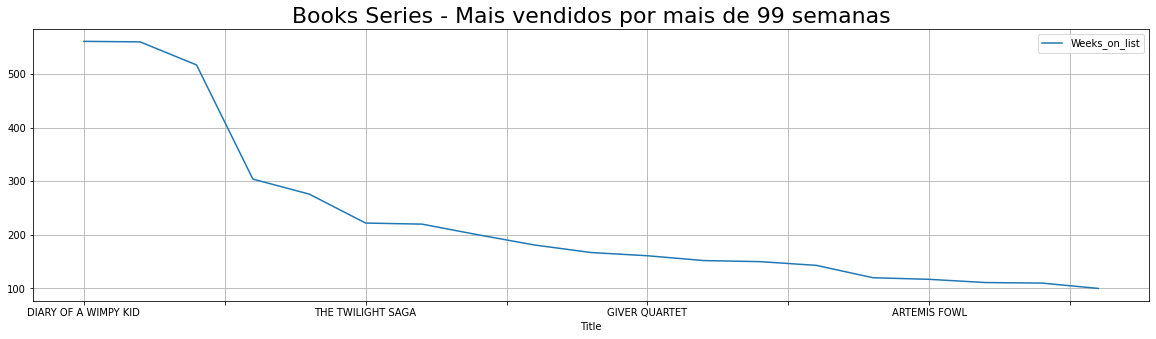

In [9]:
ax_bseries = books_series.filter(items=['Title', 'Author', 'Weeks_on_list', 'Last_week_on_list'])\
                        .where(books_series.Weeks_on_list > 99)\
                        .groupby(['Title'])\
                        .max().sort_values(by='Weeks_on_list', ascending=False)\
                        .plot(figsize=(20,5), fontsize=10, grid=True)
ax_bseries.set_title('Books Series - Mais vendidos por mais de 99 semanas', fontsize=22)
    